In [104]:
import numpy as np
import matplotlib.pyplot as plt


In [105]:
def Bn(N, Br, n, degrees):
    sum = 0
    for k in range(N):
        sum = sum + Br[k] * ( np.sin(n*degrees[k]) )
    result = (2/N)*sum
    return result

def An(N, Br, n, degrees):
    sum = 0
    for k in range(N):
        sum = sum + Br[k] * ( np.cos(n*degrees[k]) )
    result = (2/N)*sum
    return result



In [106]:
filename = "data.txt"

N = 0
Magnetic_field = []
degrees = []

with open(filename, "r") as file:
    next(file)
    next(file)

    for line in file:
        content  = line.split()
        degrees.append(float(content[0]))
        Magnetic_field.append(float(content[1]))

        N = N + 1

Magnetic_field = np.array(Magnetic_field)
degrees = np.array(degrees)
degrees = degrees*(np.pi/180)


Bn_values = []
An_values = []

n = []

for ni in range(11):
    calculation1= Bn(N, Magnetic_field, ni, degrees)
    calculation2 = An(N, Magnetic_field, ni, degrees)

    Bn_values.append(calculation1)
    An_values.append(calculation2)

    n.append(ni)

Bn_values = np.array(Bn_values)
An_values = np.array(An_values)

print(Bn_values)
print(An_values)


[ 0.00000000e+00  2.33567105e-05  2.61694254e-02 -1.45846299e-07
 -2.75662253e-07  4.72818148e-07 -5.41264318e-07  9.12052778e-08
 -1.00690705e-07  2.67233446e-07 -3.76970024e-07]
[ 1.054e-09 -1.054e-09  1.054e-09 -1.054e-09  1.054e-09 -1.054e-09
  1.054e-09 -1.054e-09  1.054e-09 -1.054e-09  1.054e-09]


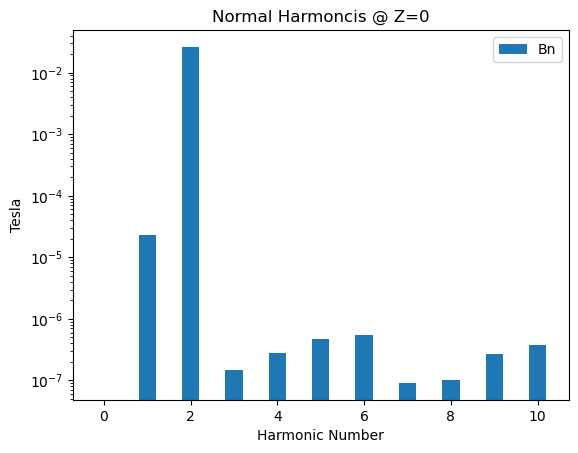

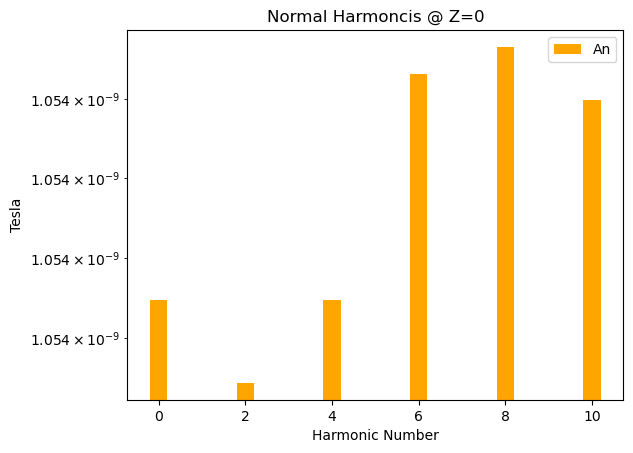

In [107]:
plt.bar(n,np.abs(Bn_values), width=0.4, label="Bn")
plt.title('Normal Harmoncis @ Z=0')
plt.xlabel('Harmonic Number')
plt.ylabel('Tesla')
plt.yscale("log")
plt.legend()
plt.show()

plt.bar(n,An_values, width=0.4, label="An", color='orange')
plt.title('Normal Harmoncis @ Z=0')
plt.xlabel('Harmonic Number')
plt.ylabel('Tesla')
plt.yscale("log")
plt.legend()
plt.show()

Below is with the data from the test.

In [108]:
filename2 =  "testing_data.csv"

N = 0
Magnetic_field = []
degrees = []
z_arr = []

with open(filename2, "r") as file:
    next(file)

    for line in file:
        content = line.split(",")
        degrees.append(float(content[0]))
        Magnetic_field.append(float(content[1]))
        z_arr.append(float(content[2]))
        N = N + 1

Magnetic_field = np.array(Magnetic_field)
degrees = np.array(degrees)
z_arr =  np.array(z_arr)

#Converting Magnetic_field from mT to T
Magnetic_field  = 1e-3*Magnetic_field

Bn_values = []
An_values = []

n = []

limit = 11

for ni in range(limit):
    calculation1 = Bn(N, Magnetic_field, ni, degrees)
    calculation2 =  An(N, Magnetic_field, ni, degrees)

    Bn_values.append(calculation1)
    An_values.append(calculation2)

    n.append(ni)

Bn_values = np.array(Bn_values)
An_values = np.array(An_values)

print(z_arr)

print(Bn_values)
print(An_values)


[   5.   10.   15. ... 1090. 1095. 1100.]
[ 0.          0.00886605  0.00182315 -0.00175891  0.00867859 -0.05169633
  0.01262619  0.00398564 -0.07219008 -0.01678075  0.00281249]
[-0.01132146 -0.01176587 -0.01409806 -0.00157447  0.00362417 -0.01879584
  0.03012346  0.00536166 -0.04072719 -0.00169032 -0.00509228]


In [109]:
# plt.bar(n,np.abs(Bn_values), width=0.4, label="Bn")
# plt.title('Normal Harmoncis @ Z=0')
# plt.xlabel('Harmonic Number')
# plt.ylabel('Tesla')
# plt.yscale("log")
# plt.legend()
# plt.show()

# plt.bar(n,An_values, width=0.4, label="An", color='orange')
# plt.title('Normal Harmoncis @ Z=0')
# plt.xlabel('Harmonic Number')
# plt.ylabel('Tesla')
# plt.yscale("log")
# plt.legend()
# plt.show()

In [110]:
def getCenter(B, deg, z):
    index  = []

    counter = 0
    for i in range(len(z)):
        if z[i] == 1100:
            index.append(i)
            counter = counter + 1
    
    Bcenter = []
    #zCenter = []
    degCenter = []
    

    for j in index:
        Bcenter.append(B[j])
        #zCenter.append(z[j])
        degCenter.append(deg[j])

    # for k in range(len(degCenter)):
    #     print(degCenter[k], Bcenter[k], zCenter[k])

    Bn_values = []
    An_values = []
    n = []

    for ni in range(11):
        cal1 = Bn(counter, Bcenter, ni, degCenter)
        cal2 = An(counter, Bcenter, ni, degCenter)

        Bn_values.append(cal1)
        An_values.append(cal2)
        n.append(ni)
        
    plt.scatter(n, np.abs(Bn_values), label = "Bn")
    plt.xlabel("Harmonic number")
    plt.ylabel("Magnetic field (T)")
    plt.legend()
    plt.show()
            

Below I am graphing the values at the center of the quadrupole.

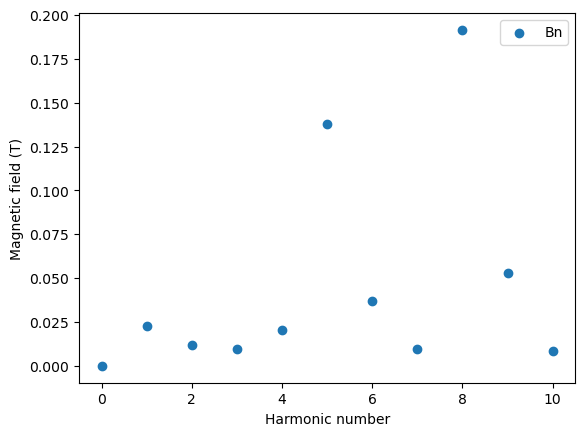

In [111]:
getCenter(Magnetic_field, degrees, z_arr)